In [290]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/datavidia2019/hotel.csv
/kaggle/input/datavidia2019/Data Dictionary.pdf
/kaggle/input/datavidia2019/flight.csv
/kaggle/input/datavidia2019/test.csv
/kaggle/input/datavidia2019/sample_submission.csv


In [291]:
train = pd.read_csv('/kaggle/input/datavidia2019/flight.csv')
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')

# PREPROCESSING

## Preprocessing: outliers
Using CLIP 

In [292]:
UPPERBOUND, LOWERBOUND = np.percentile(train.price,[99,1])

In [293]:
y = np.clip(train.price,UPPERBOUND, LOWERBOUND)

In [294]:
train['price_clipped'] = y

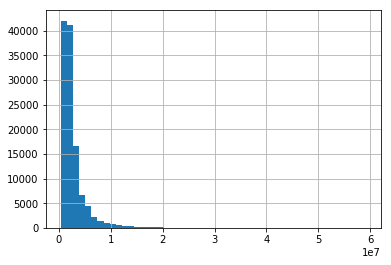

In [295]:
train.price.hist(bins=50)

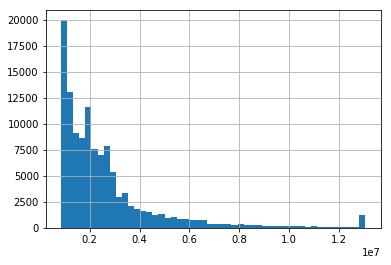

In [296]:
train.price_clipped.hist(bins=50)

## Preprocessing: rank

In [297]:
sr = pd.Series([10, 25, 3, 11, 24, 6]) 

In [298]:
index_ = ['Coca Cola', 'Sprite', 'Coke', 'Fanta', 'Dew', 'ThumbsUp'] 

In [299]:
sr.index = index_ 

In [300]:
print(sr)

Coca Cola    10
Sprite       25
Coke          3
Fanta        11
Dew          24
ThumbsUp      6
dtype: int64


In [301]:
result = sr.rank() 

In [302]:
result

Coca Cola    3.0
Sprite       6.0
Coke         1.0
Fanta        4.0
Dew          5.0
ThumbsUp     2.0
dtype: float64

In [303]:
train.airlines_name.value_counts()

6c483c0812c96f8ec43bb0ff76eaf716    36669
33199710eb822fbcfd0dc793f4788d30    30640
0a102015e48c1f68e121acc99fca9a05    20928
ad5bef60d81ea077018f4d50b813153a    11890
74c5549aa99d55280a896ea50068a211    10751
e35de6a36d385711a660c72c0286154a     7060
9855a1d3de1c46526dde37c5d6fb758c        6
6872b49542519aea7ae146e23fab5c08        2
Name: airlines_name, dtype: int64

In [304]:
train.airlines_name.replace(['6c483c0812c96f8ec43bb0ff76eaf716','33199710eb822fbcfd0dc793f4788d30', '0a102015e48c1f68e121acc99fca9a05',
                             'ad5bef60d81ea077018f4d50b813153a', '74c5549aa99d55280a896ea50068a211','e35de6a36d385711a660c72c0286154a'
                                ,'9855a1d3de1c46526dde37c5d6fb758c','6872b49542519aea7ae146e23fab5c08'],
                            ['t1','t2','t3','t4','t5','t6','t7','t8'], inplace=True)

In [305]:
train.head()

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction,price_clipped
0,912aa410a02cd7e1bab414214a7005c0,5c6f39c690f23650d3cde28e5b51c908,566.0,M,trip,ECONOMY,885898.00,NO,1.0,t2,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'",885898.00
1,d64a90a618202a5e8b25d8539377f3ca,5cbef2b87f51c18bf399d11bfe495a46,607.0,M,trip,ECONOMY,2139751.25,NO,2.0,t3,CGK - DPS,None,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8...",2139751.25
2,1a42ac02bcb4a902973123323f84da55,38fc35a1e62384012a358ab1fbd5ad03,648.0,F,trip,ECONOMY,2695550.00,NO,1.0,t3,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836....",2695550.00
3,92cddd64d4be4dec6dfbcc0c50e902f4,c7f54cb748828b4413e02dea2758faf6,418.0,F,trip,ECONOMY,1146665.00,NO,1.0,t3,CGK - DPS,None,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'",1146665.00
4,bf637abc47ea93bad22264f4956d67f6,dec228e4d2b6023c9f1fe9cfe9c451bf,537.0,F,trip,ECONOMY,1131032.50,NO,1.0,t1,CGK - DPS,None,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0...",1131032.50


In [306]:
train_ = train[['airlines_name', 'price']]

In [307]:
train_.head(3)

,airlines_name,price
0,t2,885898.00
1,t3,2139751.25
2,t3,2695550.00


In [308]:
train['price_rank'] = train_.rank().price

In [309]:
a = pd.Series([100,1,10])
a.rank()

0    3.0
1    1.0
2    2.0
dtype: float64

## Preprocessing on Categorical and Ordinal Features
- How to preproccess categorical and ordinal features ?
- How to generate new features from them ?

## Preprocessing: Label Encoder

In [310]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [311]:
train.head(1)

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction,price_clipped,price_rank
0,912aa410a02cd7e1bab414214a7005c0,5c6f39c690f23650d3cde28e5b51c908,566.0,M,trip,ECONOMY,885898.0,NO,1.0,t2,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'",885898.0,3088.0


In [312]:
le.fit(train.trip)

LabelEncoder()

In [313]:
le.classes_

array(['round', 'roundtrip', 'trip'], dtype=object)

In [314]:
trip_label = le.transform(train.trip)

In [315]:
train['trip_label'] = trip_label

In [316]:
train.trip_label.value_counts()

2    99148
1    13816
0     4982
Name: trip_label, dtype: int64

In [317]:
train.trip.value_counts()

trip         99148
roundtrip    13816
round         4982
Name: trip, dtype: int64

## Preprocessing: Factorize

In [318]:
labels, uniques = pd.factorize(train.trip) 

In [319]:
train['trip_factorize'] = labels

In [320]:
train.trip_factorize.value_counts()

0    99148
2    13816
1     4982
Name: trip_factorize, dtype: int64

## Preprocessing: Frequency Encoding

In [321]:
encoding = train.groupby('trip').size()
encoding = encoding/len(train)
train['enc']= train.trip.map(encoding)

In [322]:
train.enc.value_counts()

0.840622    99148
0.117138    13816
0.042240     4982
Name: enc, dtype: int64

## Interactions of categorical features

In [323]:
# Example of interaction of categorical.
train['gender_trip'] = train['gender'] + train['trip']

In [324]:
train.gender_trip.head()

0    Mtrip
1    Mtrip
2    Ftrip
3    Ftrip
4    Ftrip
Name: gender_trip, dtype: object

### SUMMARY
1. Values in ordinal features are sorted in some meaningful order
2. Label encoding maps categories to numbers
3. Frequency encoding maps categories to their frequencies
4. Label and frequency encodings are often used for tree-based models
5. One-hot encoding is often used for non-tree based models
6. Interactions of categorical features can help linear models and KNN

# Datetime and Coordinates
- Haven't watched yet

# Handling Missing Values

### Visualizing Missing Values !
- Used to find pattern of occurence of missing values. This is important because there is something that makes missing values has pattern.

In [325]:
import missingno as msno

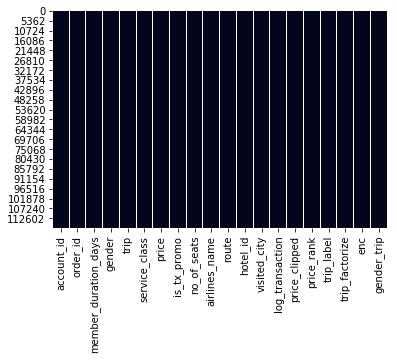

In [326]:
# Plot Missing Values in Datavidia 19 Data
sns.heatmap(train.isnull(), cbar=False)

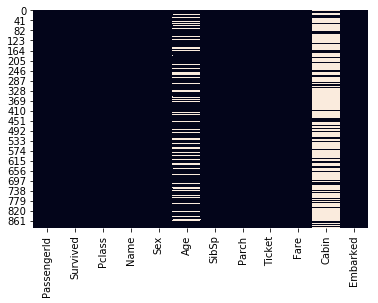

In [327]:
# Plot Missing Values in Titanic Data
sns.heatmap(titanic.isnull(), cbar=False)

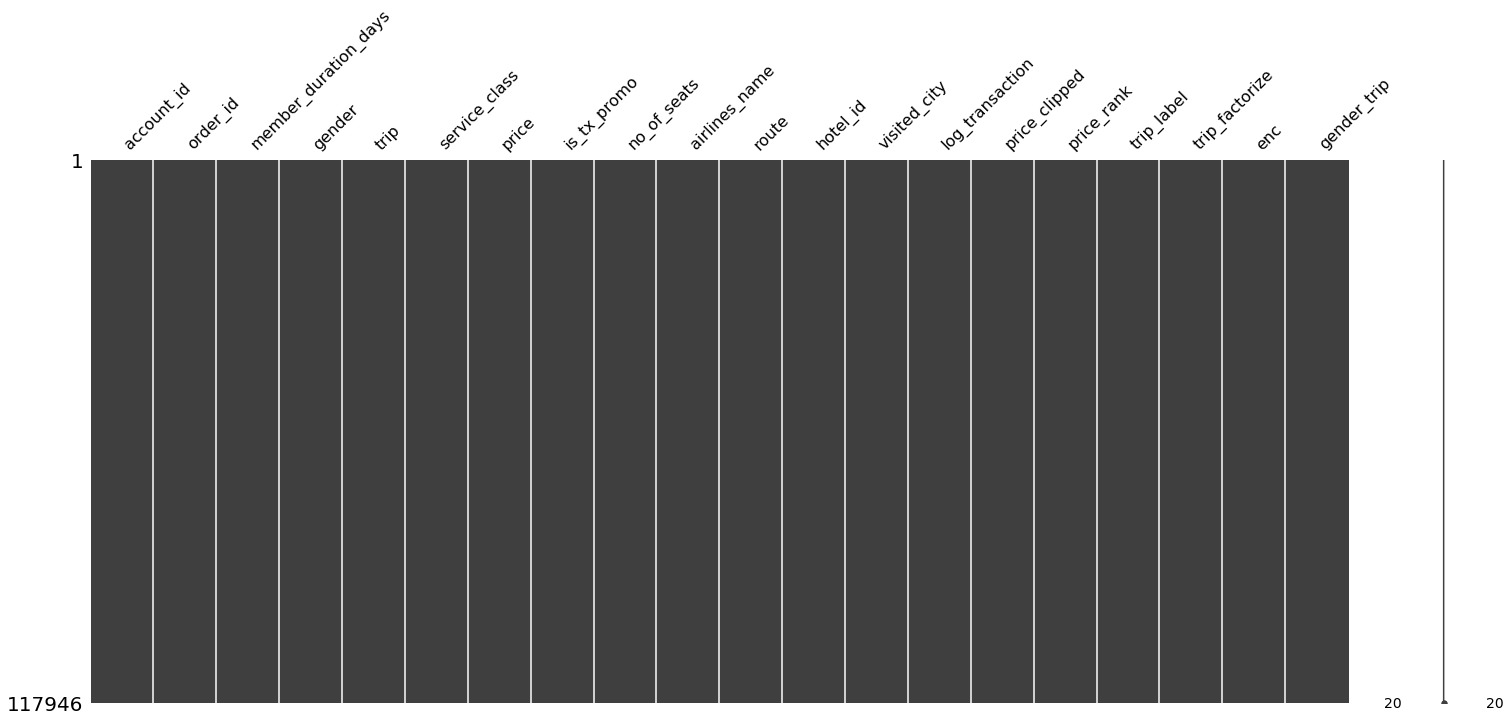

In [328]:
# Plot Missing Values in Datavidia 19 Data
msno.matrix(train)

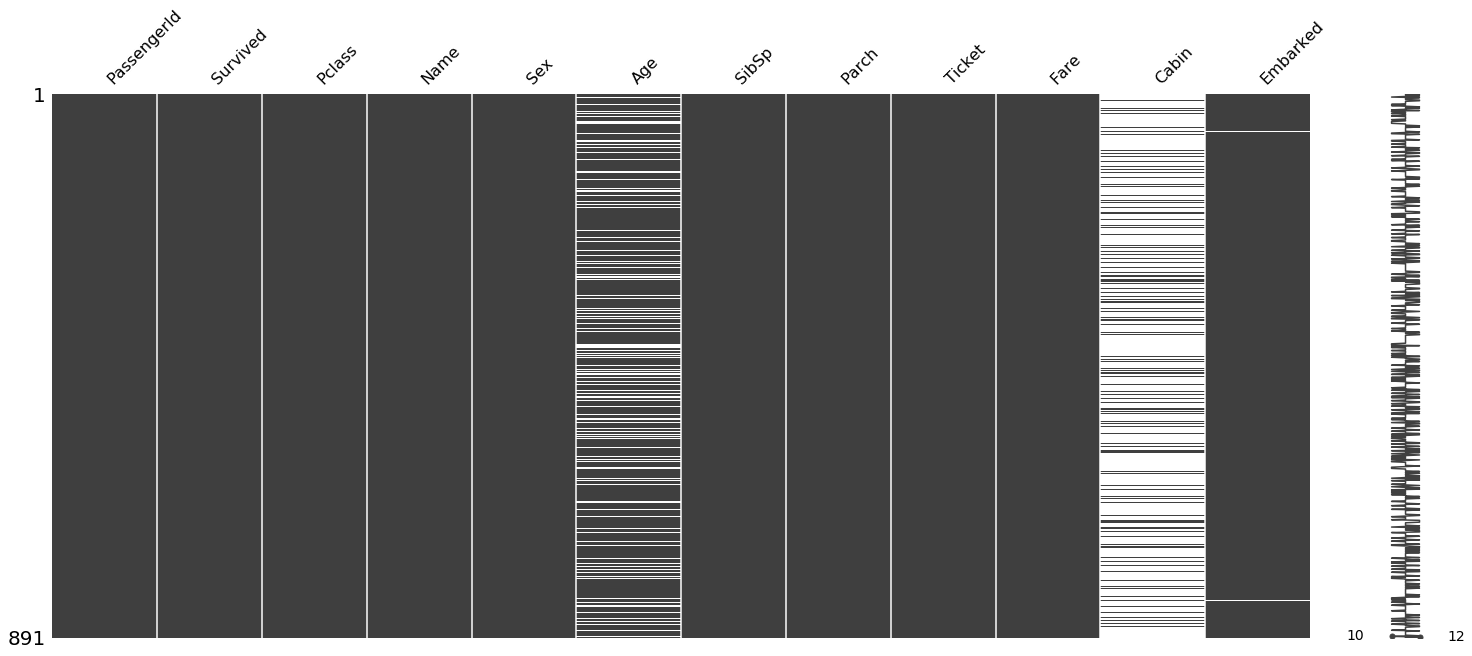

In [329]:
# Plot Missing Values in Titanic Data
msno.matrix(titanic)

The bar on the right side, shows that this is a line plot for each row's data completeness. In this dataset, all rows have 10-12 valid values and
hence 0-2 missing values.

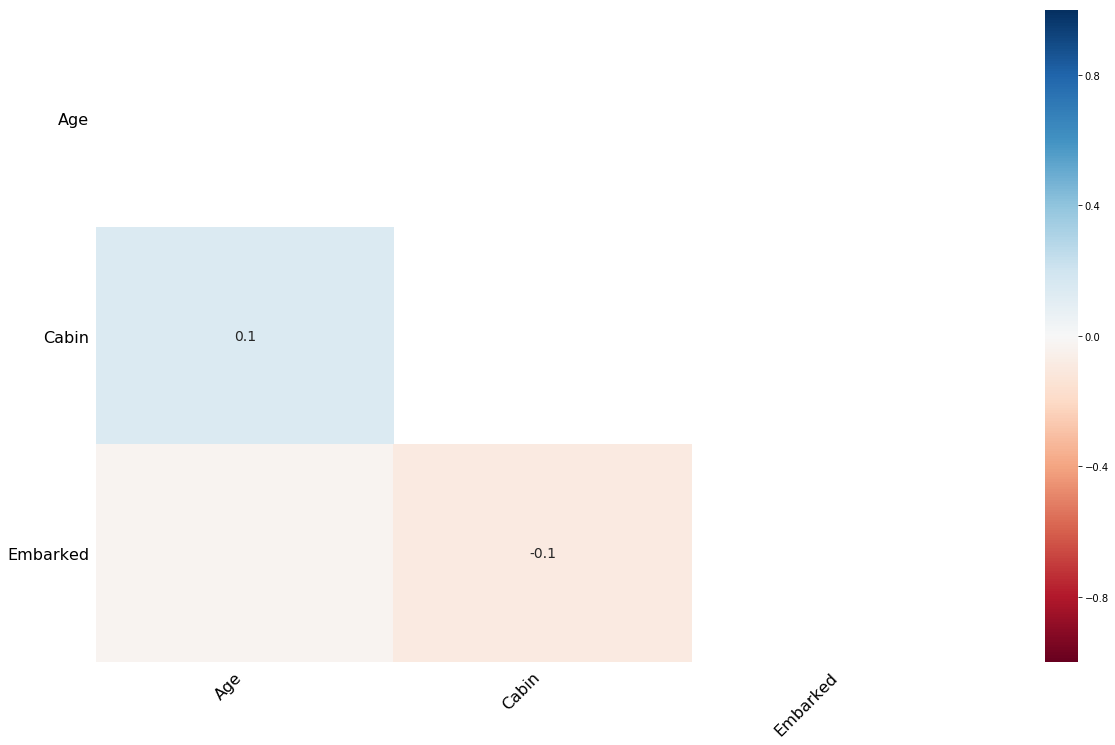

In [330]:
msno.heatmap(titanic)

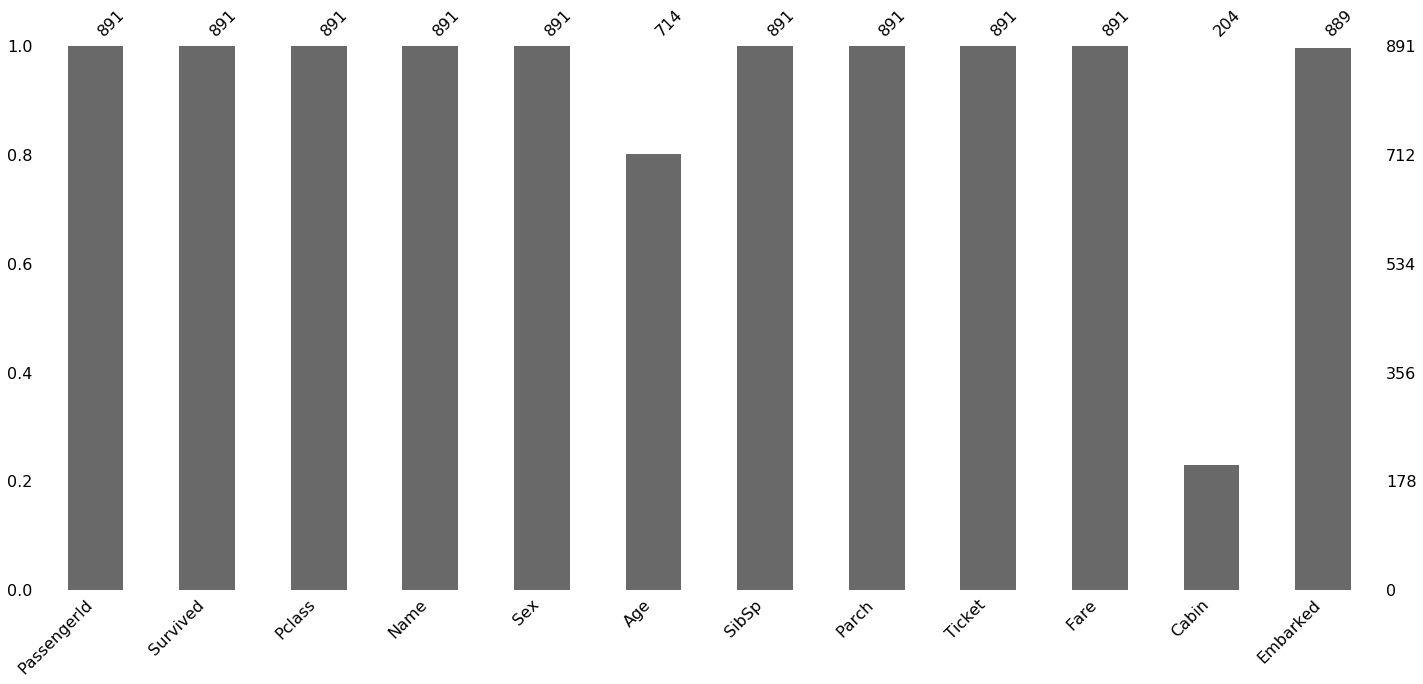

In [331]:
msno.bar(titanic)

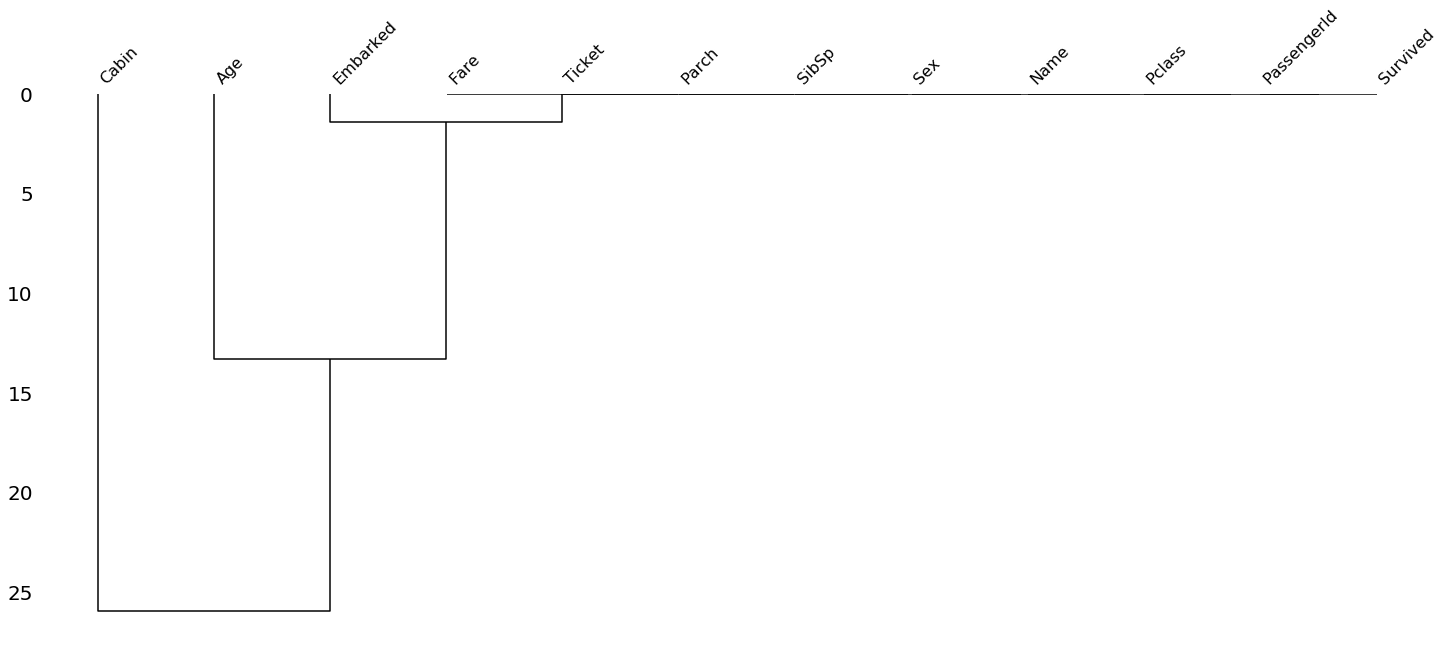

In [332]:
msno.dendrogram(titanic)

- Dapat dilihat, semakin lebar jarak antara dua kolom maka semakin tidak mirip kedua kolom tersebut. Semakin dekat jarak antara dua kolom semakin mirip kedua kolom tersebut.
- Dari dataset diatas, dapat dibedakan menjadi 2, yaitu Cabin dan yang bukan Cabin.

### Hidden NaNs
- How to find hidden NaNs ? Hidden means the missing values (NaN) replaced by -1, -999, or etc.

### Fillna approaches
1. -999, -1, etc
2. mean median
3. reconstruct value

- Note that linear model can suffer because fillna

### "Isnull" Feature
- Tree and Neural Network can be beneficial while imputing mean or median.

In [333]:
# Mencatat Indexnya
index = 0

# Membuat Kolom isnull
titanic['isnull_'] = False

for i in titanic.Age.isnull():
    if i == True:
        titanic.isnull_[index] = i
    index += 1
    
titanic.tail()

# After making the isnull feature, imput the NaN with median or mean value.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isnull_
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,False
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,False


### Missing Value Reconstruction
- There is one general concern, if you do the feature generation with missing values column.
- Note : Be careful impute the missing values before the feature generation.
- The difference between today and yesterday (missing value will) in timeseries is big, if you do the imputation with median or mean.
- Interpolate the missing values in time series data ! [ But usually we don't have time to do carefully this ]

### Feature Generation with missing values

In [334]:
row = [['A',1], ['A',4], ['A',2], ['A',-1], ['B',9], ['B', np.nan]]
df = pd.DataFrame(row, columns = ['categorical_feature','numeric_feature'])
df

,categorical_feature,numeric_feature
0,A,1.0
1,A,4.0
2,A,2.0
3,A,-1.0
4,B,9.0
5,B,NaN


In [335]:
df['numeric_feature_filled'] = df.numeric_feature.fillna(-999)
df

,categorical_feature,numeric_feature,numeric_feature_filled
0,A,1.0,1.0
1,A,4.0,4.0
2,A,2.0,2.0
3,A,-1.0,-1.0
4,B,9.0,9.0
5,B,NaN,-999.0


In [336]:
# Membuat kolom categorical_encoded : 
# 1. Jumlah total dari numeric_feature_filled yang diklasifikasikan oleh categorical_encoded dibagi dengan jumlah total categorical_feature.
# 2. Mapping nilai tersebut untuk setiap nilai categorical_feature.
df['categorical_encoded'] = df.categorical_feature.map(df.groupby('categorical_feature').numeric_feature_filled.sum() / df['categorical_feature'].value_counts())
df

,categorical_feature,numeric_feature,numeric_feature_filled,categorical_encoded
0,A,1.0,1.0,1.5
1,A,4.0,4.0,1.5
2,A,2.0,2.0,1.5
3,A,-1.0,-1.0,1.5
4,B,9.0,9.0,-495.0
5,B,NaN,-999.0,-495.0


Important note that this imputation method will screw up our model, so to handle this is ignore the mean, median or missing values when calculating the categorical_encoded feature.

Remember ! Carefully early nan imputation if you do the feature generation.
XGBoost can handle missing values and it will drastically increase the score.



In [337]:
# When you calculating the categorical_encoded without missing values's value.
df['numeric_feature'] = df.numeric_feature.fillna(0)
df['categorical_appropriate'] = df.categorical_feature.map(df.groupby('categorical_feature').numeric_feature.sum()/ df['categorical_feature'].value_counts())
df

,categorical_feature,numeric_feature,numeric_feature_filled,categorical_encoded,categorical_appropriate
0,A,1.0,1.0,1.5,1.5
1,A,4.0,4.0,1.5,1.5
2,A,2.0,2.0,1.5,1.5
3,A,-1.0,-1.0,1.5,1.5
4,B,9.0,9.0,-495.0,4.5
5,B,0.0,-999.0,-495.0,4.5


**Sometimes we can treat outlier as missing values.**

### Treating values which do not present in train data

In [364]:
row_train = [['A',0], ['A',1], ['A',1], ['A',1], ['B',0], ['B', 0], ['D',1]]
row_test = ['A','A','B','C']
tes_train = pd.DataFrame(row_train, columns = ['categorical_feature','target'])
tes_test = pd.DataFrame(row_test, columns = ['categorical_feature'])

In [365]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [366]:
display_side_by_side(tes_train, tes_test)

categorical_feature 
 target 
 
 
 
 
 0 
 A 
 0 
 
 
 1 
 A 
 1 
 
 
 2 
 A 
 1 
 
 
 3 
 A 
 1 
 
 
 4 
 B 
 0 
 
 
 5 
 B 
 0 
 
 
 6 
 D 
 1 
 
 
 
 
 
 
 categorical_feature 
 
 
 
 
 0 
 A 
 
 
 1 
 A 
 
 
 2 
 B 
 
 
 3 
 C

In [382]:
e = pd.DataFrame([[6,'A'],[3,'B'],[1,'D']], columns = ['Categorical_e','index'])
e_ = pd.DataFrame([[6,'A'],[3,'B'],[1,'C']], columns = ['Categorical_e','index'])

In [388]:
# Create number of occurences in the data for categorical_feature column
tes_train['categorical_encoded'] = tes_train.categorical_feature.map(e.groupby('index').Categorical_e.sum())
tes_test['categorical_encoded'] = tes_test.categorical_feature.map(e_.groupby('index').Categorical_e.sum())

In [387]:
display_side_by_side(tes_train, tes_test)

categorical_feature 
 target 
 categorical_encoded 
 
 
 
 
 0 
 A 
 0 
 6 
 
 
 1 
 A 
 1 
 6 
 
 
 2 
 A 
 1 
 6 
 
 
 3 
 A 
 1 
 6 
 
 
 4 
 B 
 0 
 3 
 
 
 5 
 B 
 0 
 3 
 
 
 6 
 D 
 1 
 1 
 
 
 
 
 
 
 categorical_feature 
 categorical_encoded 
 
 
 
 
 0 
 A 
 6 
 
 
 1 
 A 
 6 
 
 
 2 
 B 
 3 
 
 
 3 
 C 
 1

We treat 'C' value in categorical_feature test set same as 'D' value in categorical_feature train set.

if there is a dependencies between target with a number of occurences in each category, our model will be succesfully utilized that.

#### SUMMARY
1. The choice of method to fill NaN depends on the situtation.
2. Usual way to deal with missing values is to replace them with -999, mean or median.
3. Missing values already can be replaced with something by organizers.
4. Binary feature 'isnull' can be beneficial.
5. In general, avoid filling NaNs before feature generation.
6. Xgboost can handle NaN.